In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.api.types import is_numeric_dtype


In [17]:
sold = pd.read_csv("C:/Users/44756/Documents/Postgrad/DSA8030/Data/sold_treated.csv", dtype = {'brokered_by':'string', 'street':'string', 'zip_code':'string', 'po_box':'object'}, parse_dates = ['prev_sold_date'])

In [18]:
sold.head()

,brokered_by,price,street,city,state,zip_code,prev_sold_date,county,po_box,bed,...,dmairport,dshore,nobusiness,totalincome,adjustedincome,tax_returns,missing_bed,missing_bath,missing_acre,missing_size
0,8147.0,150000.0,1963892.0,Blandford,Massachusetts,01008,2021-12-14,Berkshire County,0,3.0,...,20.17795,107.466779,18.0,48241.0001,47826.0,660,1,1,0,1
1,53016.0,285000.0,12355.0,Blandford,Massachusetts,01008,2021-12-03,Berkshire County,0,3.0,...,20.17795,107.466779,18.0,48241.0001,47826.0,660,0,0,0,0
2,53016.0,235000.0,1637754.0,Blandford,Massachusetts,01008,2021-12-02,Berkshire County,0,3.0,...,20.17795,107.466779,18.0,48241.0001,47826.0,660,0,0,0,0
3,71852.0,95000.0,1885253.0,Blandford,Massachusetts,01008,2021-11-04,Berkshire County,0,3.0,...,20.17795,107.466779,18.0,48241.0001,47826.0,660,1,1,0,1
4,107912.0,539000.0,152107.0,Blandford,Massachusetts,01008,2021-10-29,Berkshire County,0,3.0,...,20.17795,107.466779,18.0,48241.0001,47826.0,660,0,0,0,0


In [19]:
sold.describe()

,price,prev_sold_date,bed,bath,acre_lot,house_size,avgtemp,maxtemp,mintemp,precipitation,...,dmairport,dshore,nobusiness,totalincome,adjustedincome,tax_returns,missing_bed,missing_bath,missing_acre,missing_size
count,8.051200e+05,805120,805120.000000,805120.000000,805120.000000,805120.000000,805120.000000,805120.000000,805120.000000,805120.000000,...,805120.000000,805120.000000,805120.000000,8.051200e+05,8.051200e+05,805120.000000,805120.000000,805120.000000,805120.000000,805120.000000
mean,4.700998e+05,2022-02-08 20:17:38.286963456,3.159994,2.358632,0.599574,1858.461743,59.936924,70.644539,49.471892,41.034047,...,24.870413,173.250943,667.048183,1.335883e+06,1.321509e+06,15105.603187,0.084471,0.094419,0.132285,0.126110
min,1.000000e+00,2021-10-18 00:00:00,1.000000,1.000000,0.000000,100.000000,43.520000,58.225000,36.675000,2.270000,...,0.195081,0.011449,1.000000,2.925000e+03,2.925000e+03,90.000000,0.000000,0.000000,0.000000,0.000000
25%,2.049000e+05,2021-12-20 00:00:00,3.000000,2.000000,0.150000,1323.000000,52.600000,62.200000,43.000000,25.750000,...,12.158071,20.108689,283.000000,5.434390e+05,5.382060e+05,8350.000000,0.000000,0.000000,0.000000,0.000000
50%,3.450000e+05,2022-02-18 00:00:00,3.000000,2.000000,0.210000,1680.000000,59.400000,70.400000,48.800000,44.910000,...,20.721798,71.931620,565.000000,1.063197e+06,1.052347e+06,14550.000000,0.000000,0.000000,0.000000,0.000000
75%,5.500000e+05,2022-03-31 00:00:00,4.000000,3.000000,0.370000,2157.000000,66.100000,77.200000,55.200000,53.980000,...,33.647543,305.594770,943.000000,1.765879e+06,1.746353e+06,21140.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000e+06,2022-05-06 00:00:00,6.000000,6.000000,5.000000,5459.630000,78.200000,89.800000,69.900000,88.175000,...,67.965371,675.674547,2110.000000,6.063217e+06,5.997873e+06,31493.000000,1.000000,1.000000,1.000000,1.000000
std,4.924975e+05,NaN,0.962483,0.953505,1.128119,841.677881,8.441544,8.718632,8.065099,21.335493,...,16.708786,202.545042,497.791371,1.134022e+06,1.121428e+06,8616.408061,0.278093,0.292412,0.338800,0.331974


In [20]:
sold.corr(numeric_only = True)

,price,bed,bath,acre_lot,house_size,avgtemp,maxtemp,mintemp,precipitation,population,...,dmairport,dshore,nobusiness,totalincome,adjustedincome,tax_returns,missing_bed,missing_bath,missing_acre,missing_size
price,1.000000,0.287953,0.467274,0.020183,0.461420,0.027721,0.032178,0.023907,-0.190213,0.095568,...,-0.083257,-0.188594,0.251719,0.465513,0.465076,0.113061,-0.136857,-0.132726,-0.031887,-0.141248
bed,0.287953,1.000000,0.605282,0.008841,0.670154,-0.032311,-0.026480,-0.039741,-0.005839,0.061980,...,0.003683,0.028179,-0.060237,0.028753,0.028833,0.047202,-0.030729,-0.006485,-0.279603,-0.037274
bath,0.467274,0.605282,1.000000,0.020047,0.756373,0.046341,0.043633,0.045758,0.024035,0.085919,...,-0.022764,-0.022796,0.078759,0.211187,0.210991,0.089824,-0.083191,-0.072625,-0.111957,-0.096124
acre_lot,0.020183,0.008841,0.020047,1.000000,0.095214,-0.070673,-0.054699,-0.077334,0.040589,-0.250509,...,0.221155,0.093402,-0.198081,-0.182180,-0.182327,-0.271752,0.288047,0.261362,-0.134835,0.227448
house_size,0.461420,0.670154,0.756373,0.095214,1.000000,-0.022546,-0.021154,-0.021614,0.026924,0.018526,...,0.021324,0.028388,0.009963,0.151052,0.150836,0.013812,-0.042090,-0.030267,-0.185936,-0.080546
avgtemp,0.027721,-0.032311,0.046341,-0.070673,-0.022546,1.000000,0.982199,0.979974,-0.036686,0.211068,...,-0.097601,-0.019481,0.055073,0.102213,0.102530,0.197856,0.058023,0.009296,-0.023152,-0.030893
maxtemp,0.032178,-0.026480,0.043633,-0.054699,-0.021154,0.982199,1.000000,0.931287,-0.150385,0.216370,...,-0.081276,0.077914,0.042393,0.085592,0.085921,0.197569,0.062762,0.012668,-0.052119,-0.039114
mintemp,0.023907,-0.039741,0.045758,-0.077334,-0.021614,0.979974,0.931287,1.000000,0.091576,0.193942,...,-0.103802,-0.115862,0.063592,0.114149,0.114458,0.187280,0.060180,0.012697,0.006029,-0.020120
precipitation,-0.190213,-0.005839,0.024035,0.040589,0.026924,-0.036686,-0.150385,0.091576,1.000000,-0.141018,...,0.003111,-0.172513,-0.052815,-0.083355,-0.083310,-0.119361,0.040255,0.028045,0.080745,0.097461
population,0.095568,0.061980,0.085919,-0.250509,0.018526,0.211068,0.216370,0.193942,-0.141018,1.000000,...,-0.247354,-0.072400,0.575514,0.607089,0.607951,0.970270,-0.159529,-0.164075,0.039671,-0.144845


In [21]:
numvars = ['bed', 'bath', 'acre_lot', 'house_size', 'avgtemp', 'maxtemp', 'mintemp', 'precipitation', 'population', 'density', 'dhighway', 'dlairport', 'dmairport', 'dshore', 'nobusiness', 'totalincome', 'adjustedincome', 'tax_returns']

<Axes: >

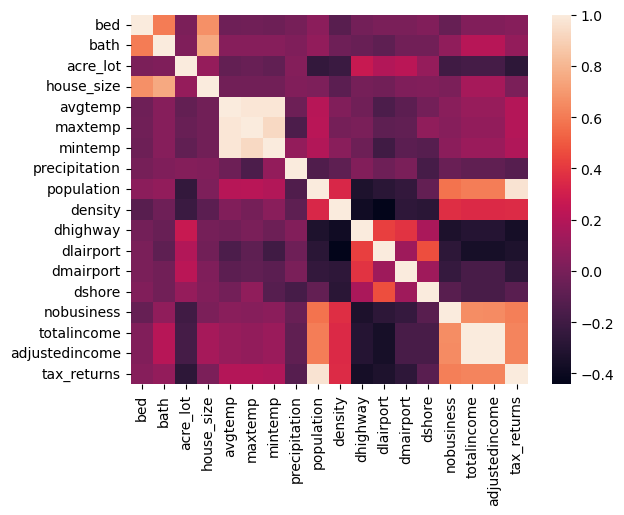

In [22]:
sns.heatmap(sold[numvars].corr(numeric_only=True))

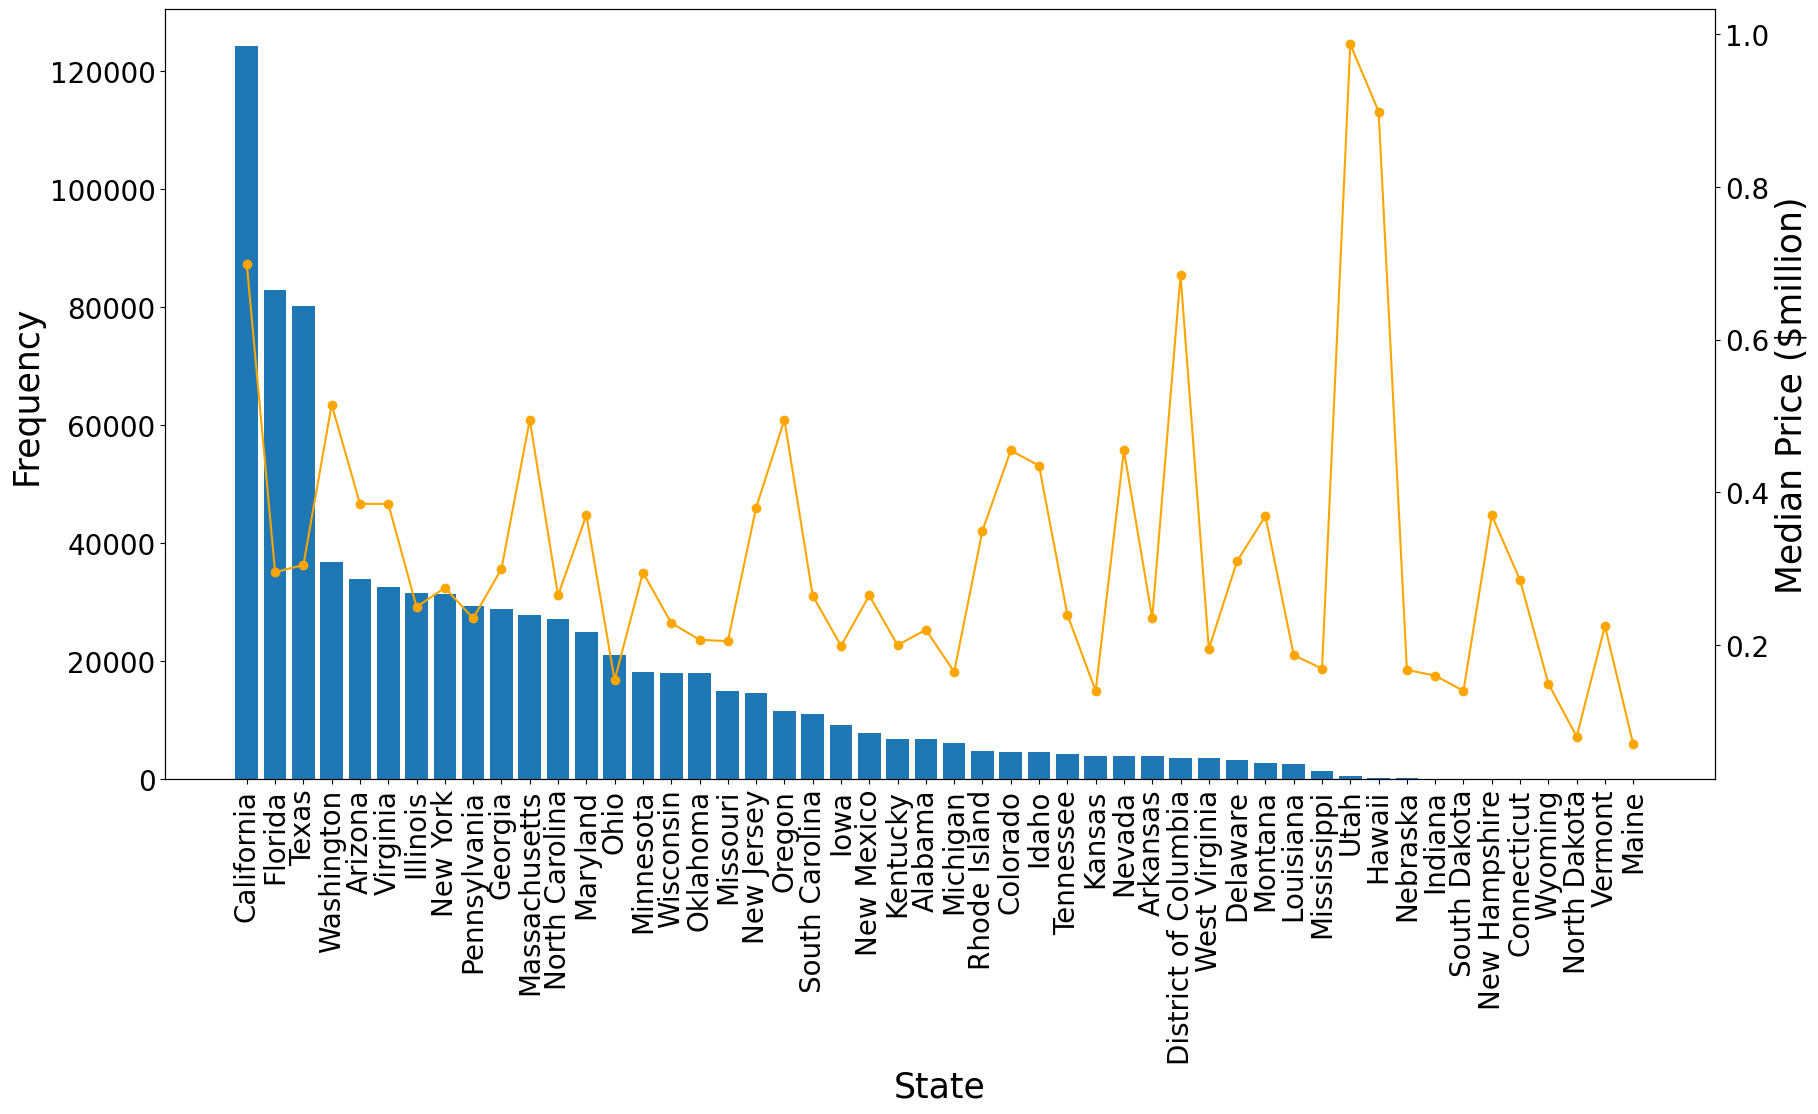

In [23]:
# Frequencies of states along with median price
fig, ax = plt.subplots(figsize=(20,10))

states = sold.groupby('state').describe()['price'].sort_values(by = 'count', ascending = False).index.tolist()
freq = [len(sold[sold['state'] == st]) for st in states]
prices = [sold[sold.state == st].price.median() for st in states]

ax.bar(states, freq)
ax.tick_params(axis='both', labelsize = '20')
ax.set_xlabel('State', fontsize = 25)
ax.set_ylabel('Frequency', fontsize = 25)
plt.xticks(rotation = 90)
ax2 = ax.twinx()
ax2.tick_params(axis='both', labelsize = '20')
ax2.plot(states, prices, color = 'orange')
ax2.scatter(states, prices, color = 'orange')
ax2.set_ylabel('Median Price ($million)', fontsize = 25)
ax2.set_yticks(ticks = [200000,400000,600000,800000,1000000], labels = [0.2,0.4,0.6,0.8,1.0])
plt.show()

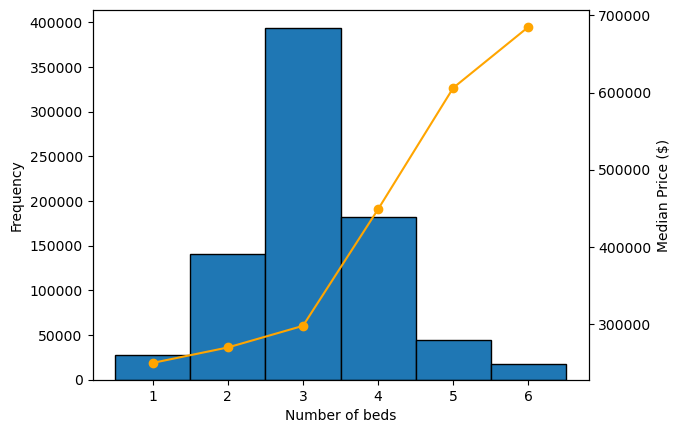

In [24]:
# Bed univariate
fig, ax = plt.subplots()

hist = ax.hist(sold[sold.bed <= sold.bed.quantile(0.999)].bed, ec = 'black', bins = np.arange(0.5,7.5))
prices = [sold[sold.bed == x].price.median() for x in np.arange(1,7)]
ax.set_xticks(ticks = np.arange(0,7), labels = np.arange(0,7))
ax.set_xlabel('Number of beds')
ax.set_ylabel('Frequency')
ax2 = ax.twinx()
ax2.plot(np.arange(1,7), prices, color = 'orange')
ax2.scatter(np.arange(1,7), prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
plt.show()

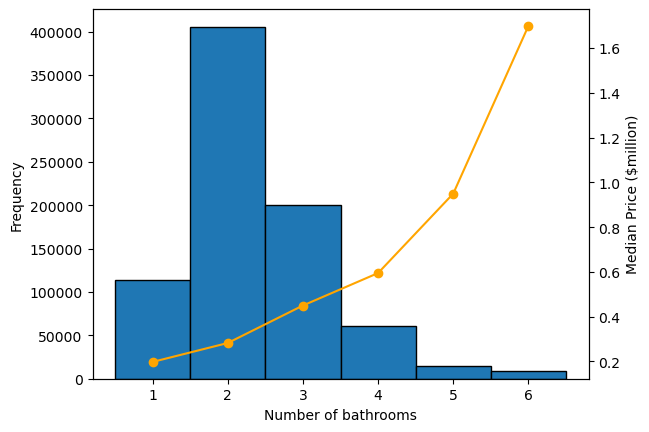

In [25]:
# Bath univariate
fig, ax = plt.subplots()

hist = ax.hist(sold[sold.bath <= sold.bath.quantile(0.999)].bath, ec = 'black', bins = np.arange(0.5,7.5))
prices = [sold[sold.bath == x].price.median() for x in np.arange(1,7)]
ax.set_xticks(ticks = np.arange(0,7), labels = np.arange(0,7))
ax.set_xlabel('Number of bathrooms')
ax.set_ylabel('Frequency')
ax2 = ax.twinx()
ax2.plot(np.arange(1,7), prices, color = 'orange')
ax2.scatter(np.arange(1,7), prices, color = 'orange')
ax2.set_ylabel('Median Price ($million)')
ax2.set_yticks(ticks = [200000,400000,600000,800000,1000000,1200000,1400000,1600000], labels = [0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6])
plt.show()

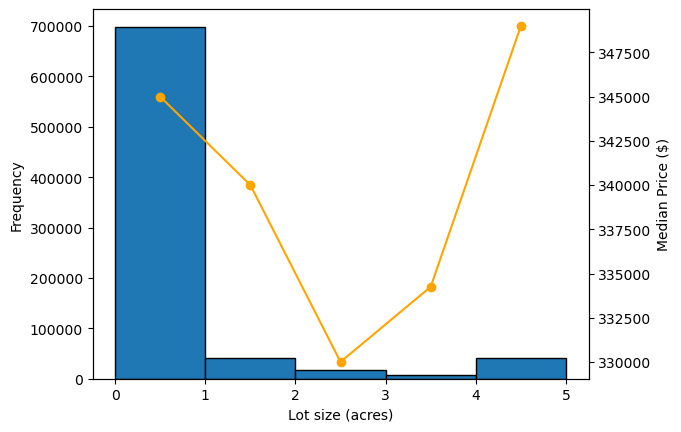

In [26]:
# Acre lot univariate
fig, ax = plt.subplots()

hist = ax.hist(sold.acre_lot, ec = 'black', bins = 5)
midpts = [((hist[1][x] + hist[1][x+1])/2) for x in range(len(hist[1])-1)]
prices = [sold[(sold.acre_lot >= hist[1][x]) & (sold.acre_lot < hist[1][x+1])].price.median() for x in range(len(hist[1])-1)]
ax.set_xlabel('Lot size (acres)')
ax.set_ylabel('Frequency')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
plt.show()

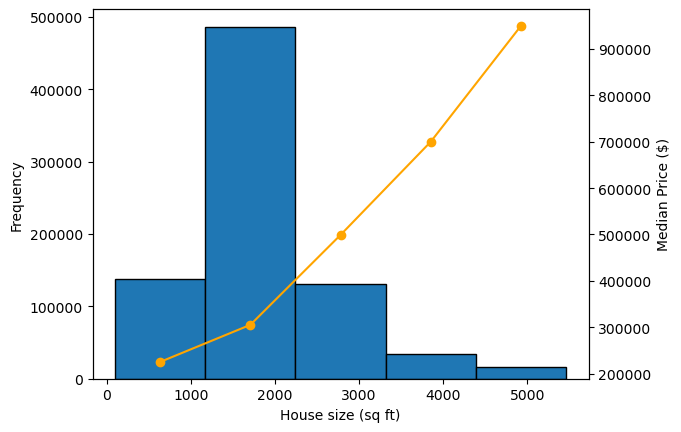

In [27]:
# House size univariate
fig, ax = plt.subplots()

hist = ax.hist(sold.house_size, ec = 'black', bins = 5)
midpts = [((hist[1][x] + hist[1][x+1])/2) for x in range(len(hist[1])-1)]
prices = [sold[(sold.house_size >= hist[1][x]) & (sold.house_size < hist[1][x+1])].price.median() for x in range(len(hist[1])-1)]
ax.set_xlabel('House size (sq ft)')
ax.set_ylabel('Frequency')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
plt.show()

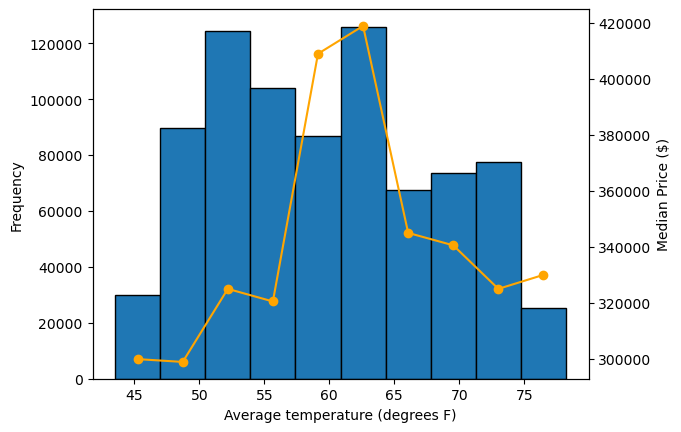

In [28]:
# Avg temp univariate
fig, ax = plt.subplots()

hist = ax.hist(sold.avgtemp, ec = 'black')
midpts = [((hist[1][x] + hist[1][x+1])/2) for x in range(len(hist[1])-1)]
prices = [sold[(sold.avgtemp >= hist[1][x]) & (sold.avgtemp < hist[1][x+1])].price.median() for x in range(len(hist[1])-1)]
ax.set_xlabel('Average temperature (degrees F)')
ax.set_ylabel('Frequency')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
plt.show()

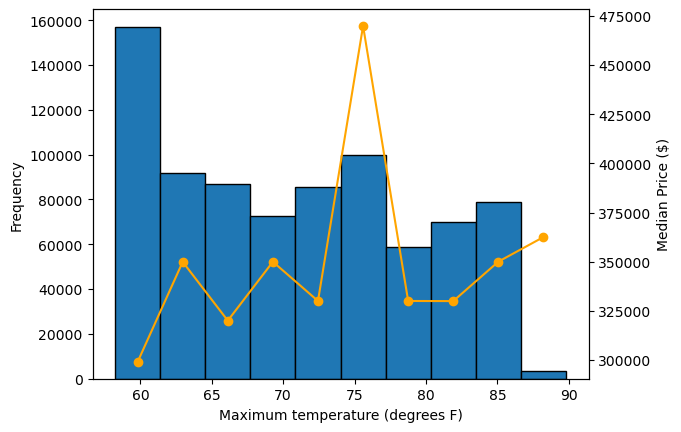

In [29]:
# Max temp univariate
fig, ax = plt.subplots()

hist = ax.hist(sold.maxtemp, ec = 'black')
midpts = [((hist[1][x] + hist[1][x+1])/2) for x in range(len(hist[1])-1)]
prices = [sold[(sold.maxtemp >= hist[1][x]) & (sold.maxtemp < hist[1][x+1])].price.median() for x in range(len(hist[1])-1)]
ax.set_xlabel('Maximum temperature (degrees F)')
ax.set_ylabel('Frequency')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
plt.show()

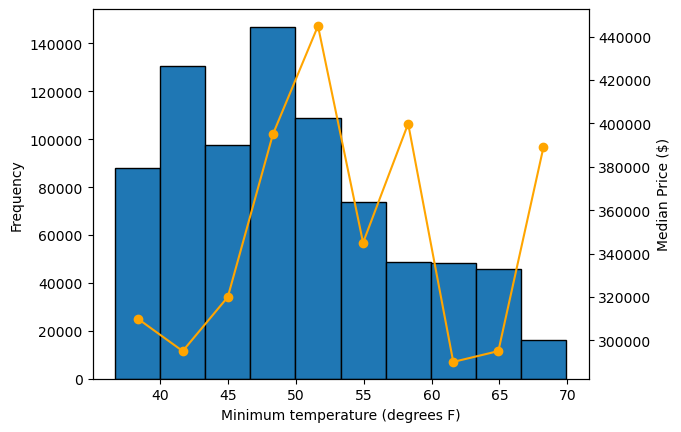

In [30]:
# Min temp univariate
fig, ax = plt.subplots()

hist = ax.hist(sold.mintemp, ec = 'black')
midpts = [((hist[1][x] + hist[1][x+1])/2) for x in range(len(hist[1])-1)]
prices = [sold[(sold.mintemp >= hist[1][x]) & (sold.mintemp < hist[1][x+1])].price.median() for x in range(len(hist[1])-1)]
ax.set_xlabel('Minimum temperature (degrees F)')
ax.set_ylabel('Frequency')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
plt.show()

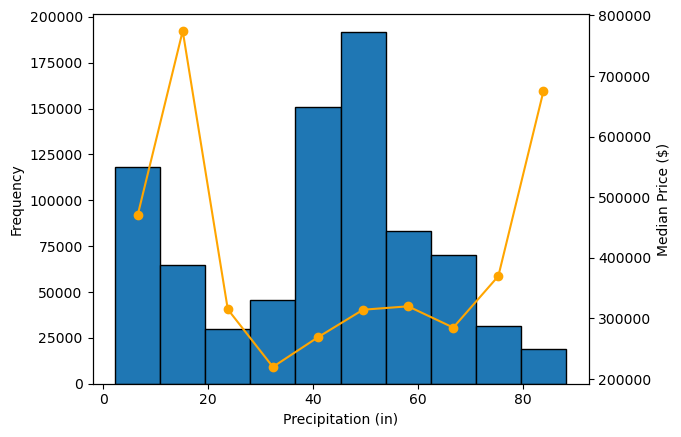

In [31]:
# Precipitation univariate
fig, ax = plt.subplots()

hist = ax.hist(sold.precipitation, ec = 'black')
midpts = [((hist[1][x] + hist[1][x+1])/2) for x in range(len(hist[1])-1)]
prices = [sold[(sold.precipitation >= hist[1][x]) & (sold.precipitation < hist[1][x+1])].price.median() for x in range(len(hist[1])-1)]
ax.set_xlabel('Precipitation (in)')
ax.set_ylabel('Frequency')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
plt.show()

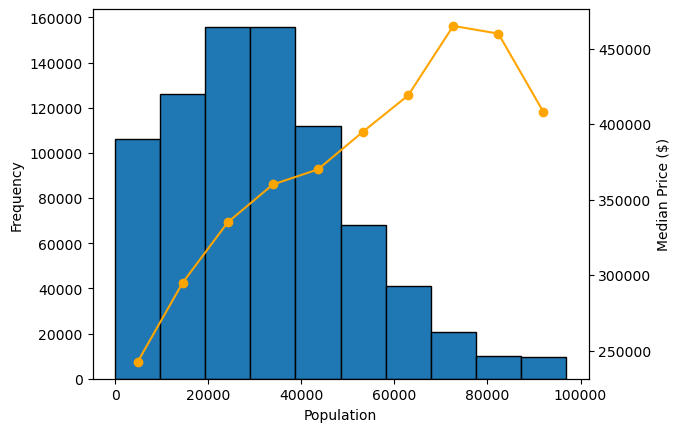

In [32]:
# Population univariate
fig, ax = plt.subplots()

hist = ax.hist(sold.population, ec = 'black')
midpts = [((hist[1][x] + hist[1][x+1])/2) for x in range(len(hist[1])-1)]
prices = [sold[(sold.population >= hist[1][x]) & (sold.population < hist[1][x+1])].price.median() for x in range(len(hist[1])-1)]
ax.set_xlabel('Population')
ax.set_ylabel('Frequency')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
plt.show()

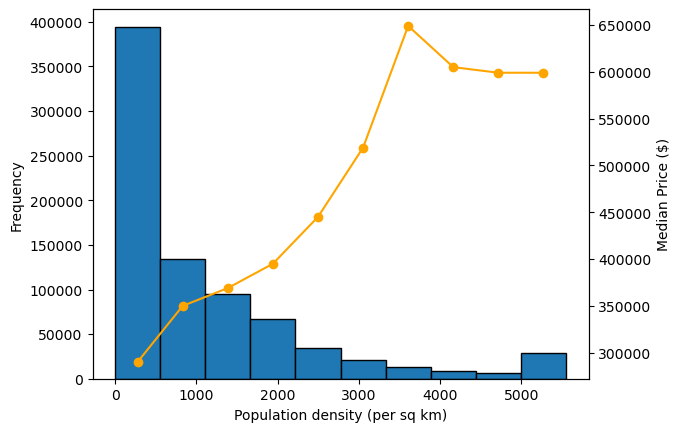

In [33]:
# Density univariate
fig, ax = plt.subplots()

hist = ax.hist(sold.density, ec = 'black')
midpts = [((hist[1][x] + hist[1][x+1])/2) for x in range(len(hist[1])-1)]
prices = [sold[(sold.density >= hist[1][x]) & (sold.density < hist[1][x+1])].price.median() for x in range(len(hist[1])-1)]
ax.set_xlabel('Population density (per sq km)')
ax.set_ylabel('Frequency')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
plt.show()

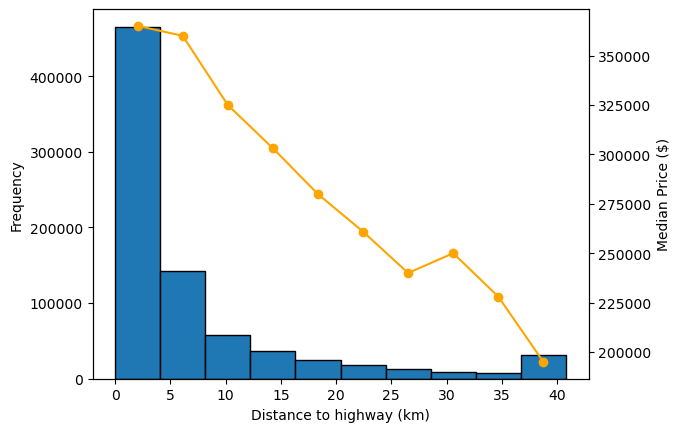

In [34]:
# Distance to highway univariate
fig, ax = plt.subplots()

hist = ax.hist(sold.dhighway, ec = 'black')
midpts = [((hist[1][x] + hist[1][x+1])/2) for x in range(len(hist[1])-1)]
prices = [sold[(sold.dhighway >= hist[1][x]) & (sold.dhighway < hist[1][x+1])].price.median() for x in range(len(hist[1])-1)]
ax.set_xlabel('Distance to highway (km)')
ax.set_ylabel('Frequency')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
plt.show()

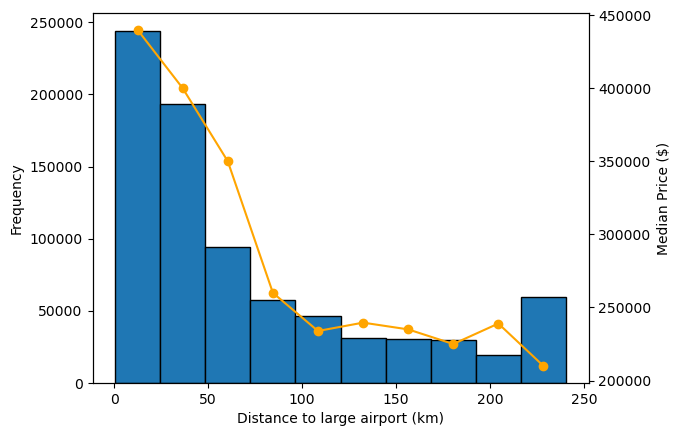

In [35]:
# Distance to large airport univariate
fig, ax = plt.subplots()

hist = ax.hist(sold.dlairport, ec = 'black')
midpts = [((hist[1][x] + hist[1][x+1])/2) for x in range(len(hist[1])-1)]
prices = [sold[(sold.dlairport >= hist[1][x]) & (sold.dlairport < hist[1][x+1])].price.median() for x in range(len(hist[1])-1)]
ax.set_xlabel('Distance to large airport (km)')
ax.set_ylabel('Frequency')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
plt.show()

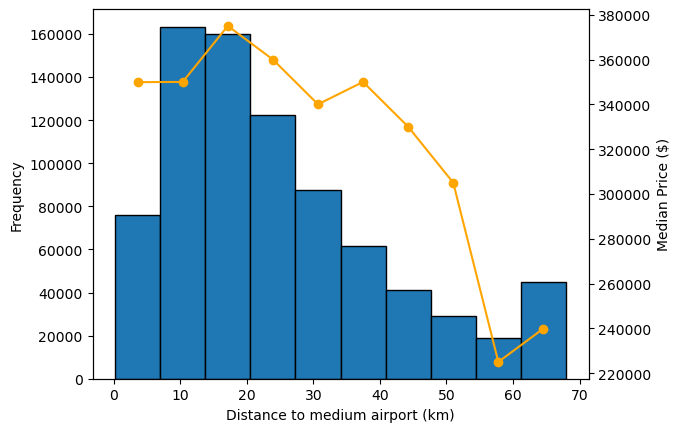

In [36]:
# Distance to medium airport univariate
fig, ax = plt.subplots()

hist = ax.hist(sold.dmairport, ec = 'black')
midpts = [((hist[1][x] + hist[1][x+1])/2) for x in range(len(hist[1])-1)]
prices = [sold[(sold.dmairport >= hist[1][x]) & (sold.dmairport < hist[1][x+1])].price.median() for x in range(len(hist[1])-1)]
ax.set_xlabel('Distance to medium airport (km)')
ax.set_ylabel('Frequency')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
plt.show()

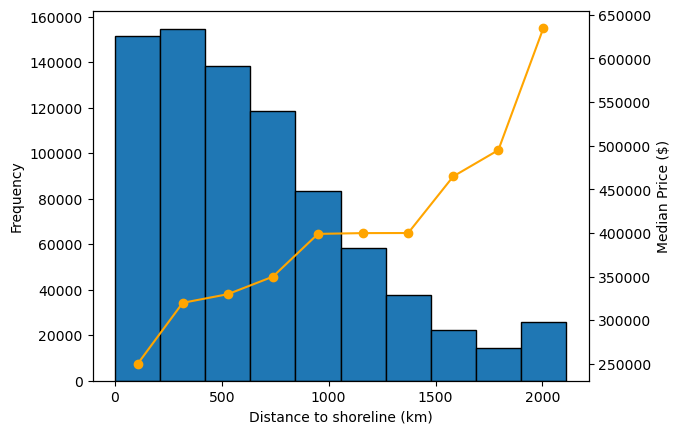

In [37]:
# Distance to shoreline univariate
fig, ax = plt.subplots()

hist = ax.hist(sold.nobusiness, ec = 'black')
midpts = [((hist[1][x] + hist[1][x+1])/2) for x in range(len(hist[1])-1)]
prices = [sold[(sold.nobusiness >= hist[1][x]) & (sold.nobusiness < hist[1][x+1])].price.median() for x in range(len(hist[1])-1)]
ax.set_xlabel('Distance to shoreline (km)')
ax.set_ylabel('Frequency')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
plt.show()

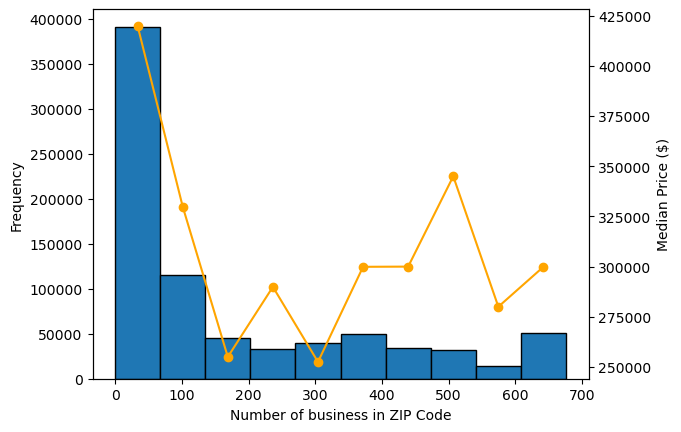

In [38]:
# Number of businesses univariate
fig, ax = plt.subplots()

hist = ax.hist(sold.dshore, ec = 'black')
midpts = [((hist[1][x] + hist[1][x+1])/2) for x in range(len(hist[1])-1)]
prices = [sold[(sold.dshore >= hist[1][x]) & (sold.dshore < hist[1][x+1])].price.median() for x in range(len(hist[1])-1)]
ax.set_xlabel('Number of business in ZIP Code')
ax.set_ylabel('Frequency')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
plt.show()

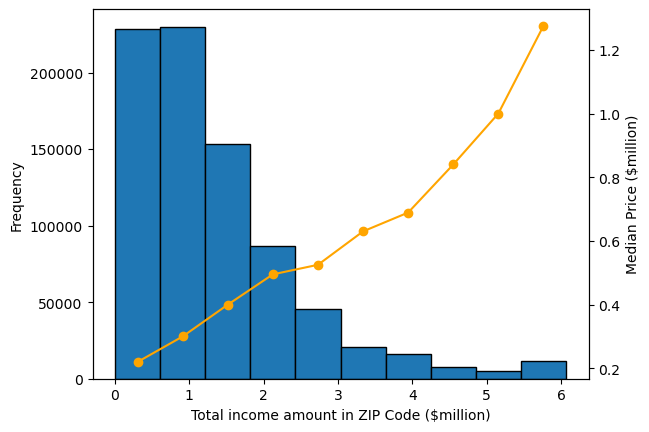

In [39]:
# Total income univariate
fig, ax = plt.subplots()

hist = ax.hist(sold.totalincome, ec = 'black')
midpts = [((hist[1][x] + hist[1][x+1])/2) for x in range(len(hist[1])-1)]
prices = [sold[(sold.totalincome >= hist[1][x]) & (sold.totalincome < hist[1][x+1])].price.median() for x in range(len(hist[1])-1)]
ax.set_xlabel('Total income amount in ZIP Code ($million)')
ax.set_xticks(ticks = [0,1000000,2000000,3000000,4000000,5000000,6000000], labels = [0,1,2,3,4,5,6])
ax.set_ylabel('Frequency')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($million)')
ax2.set_yticks(ticks = [200000,400000,600000,800000,1000000,1200000], labels = [0.2,0.4,0.6,0.8,1.0,1.2])
plt.show()

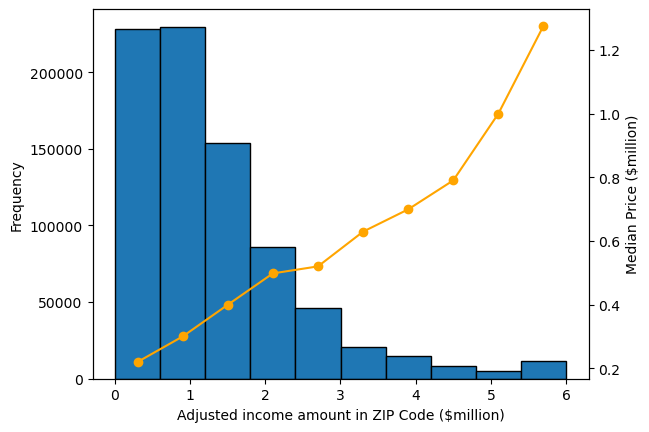

In [40]:
# Adjusted income univariate
fig, ax = plt.subplots()

hist = ax.hist(sold.adjustedincome, ec = 'black')
midpts = [((hist[1][x] + hist[1][x+1])/2) for x in range(len(hist[1])-1)]
prices = [sold[(sold.adjustedincome >= hist[1][x]) & (sold.adjustedincome < hist[1][x+1])].price.median() for x in range(len(hist[1])-1)]
ax.set_xlabel('Adjusted income amount in ZIP Code ($million)')
ax.set_xticks(ticks = [0,1000000,2000000,3000000,4000000,5000000,6000000], labels = [0,1,2,3,4,5,6])
ax.set_ylabel('Frequency')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($million)')
ax2.set_yticks(ticks = [200000,400000,600000,800000,1000000,1200000], labels = [0.2,0.4,0.6,0.8,1.0,1.2])
plt.show()

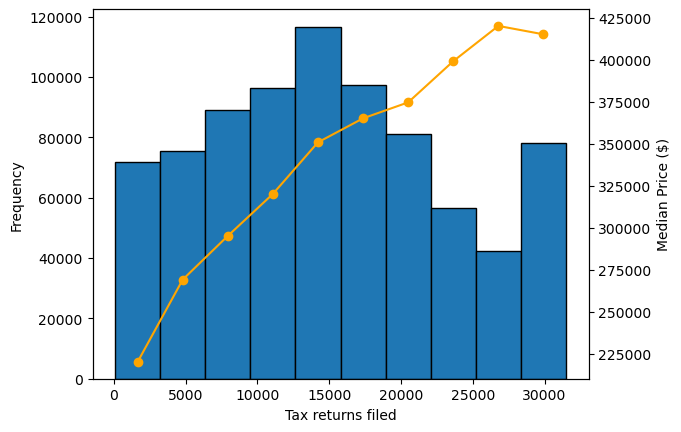

In [41]:
# Tax returns filed univariate
fig, ax = plt.subplots()

hist = ax.hist(sold.tax_returns, ec = 'black')
midpts = [((hist[1][x] + hist[1][x+1])/2) for x in range(len(hist[1])-1)]
prices = [sold[(sold.tax_returns >= hist[1][x]) & (sold.tax_returns < hist[1][x+1])].price.median() for x in range(len(hist[1])-1)]
ax.set_xlabel('Tax returns filed')
ax.set_ylabel('Frequency')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
plt.show()

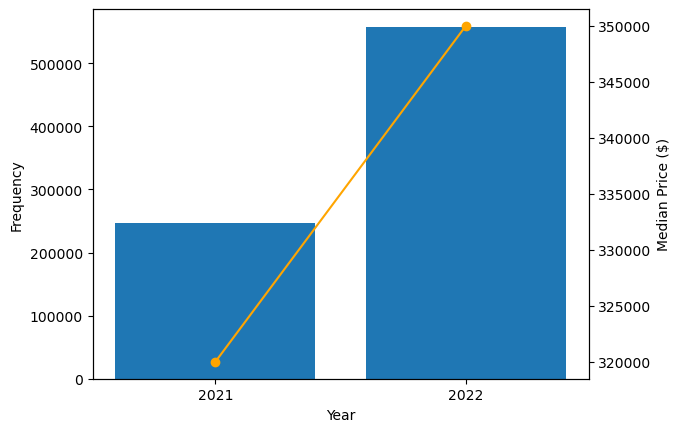

In [42]:
# Frequencies of years along with median price
fig, ax = plt.subplots()

years = [2021,2022]
freq = sold.prev_sold_date.dt.year.value_counts().sort_index().to_list()
prices = [sold[sold.prev_sold_date.dt.year == yr].price.median() for yr in years]

ax.bar(years, freq)
ax.tick_params(axis='both')
ax.set_xlabel('Year')
ax.set_xticks(ticks = years, labels = years)
ax.set_ylabel('Frequency')
ax2 = ax.twinx()
ax2.tick_params(axis='both')
ax2.plot(years, prices, color = 'orange')
ax2.scatter(years, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
plt.show()

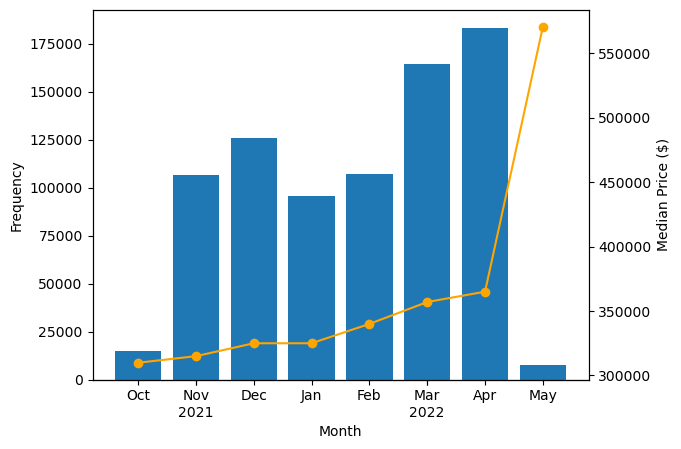

In [43]:
# Frequencies of months along with median price
fig, ax = plt.subplots()

months = sold.prev_sold_date.dt.strftime('%Y-%m').value_counts().sort_index().index.tolist()
freq = sold.prev_sold_date.dt.to_period('M').value_counts().sort_index().tolist()
prices = [sold[sold.prev_sold_date.dt.to_period('M') == mt].price.median() for mt in months]

ax.bar(months, freq)
ax.tick_params(axis='both')
ax.set_xlabel('\nMonth')
ax.set_xticks(ticks = months, labels = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May'])
sec = ax.secondary_xaxis(location = 0)
sec.set_xticks(ticks = [1,5], labels = ['\n2021', '\n2022'])
ax.set_ylabel('Frequency')
ax2 = ax.twinx()
ax2.tick_params(axis='both')
ax2.plot(months, prices, color = 'orange')
ax2.scatter(months, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
plt.show()

<Axes: >

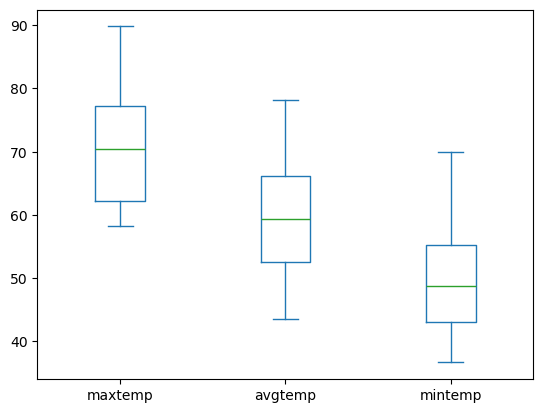

In [44]:
sold[['maxtemp', 'avgtemp', 'mintemp']].plot(kind = "box")

<Axes: >

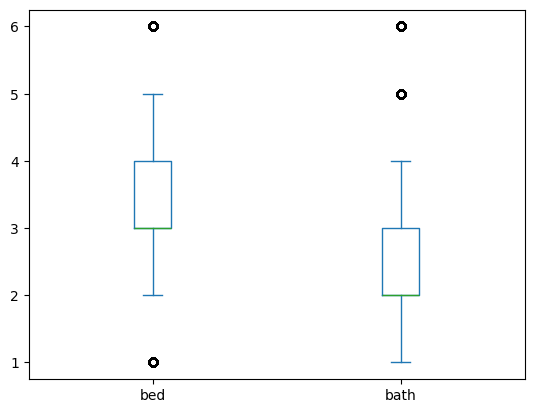

In [45]:
sold[['bed', 'bath']].plot(kind = "box")

In [46]:
numvars

['bed',
 'bath',
 'acre_lot',
 'house_size',
 'avgtemp',
 'maxtemp',
 'mintemp',
 'precipitation',
 'population',
 'density',
 'dhighway',
 'dlairport',
 'dmairport',
 'dshore',
 'nobusiness',
 'totalincome',
 'adjustedincome',
 'tax_returns']

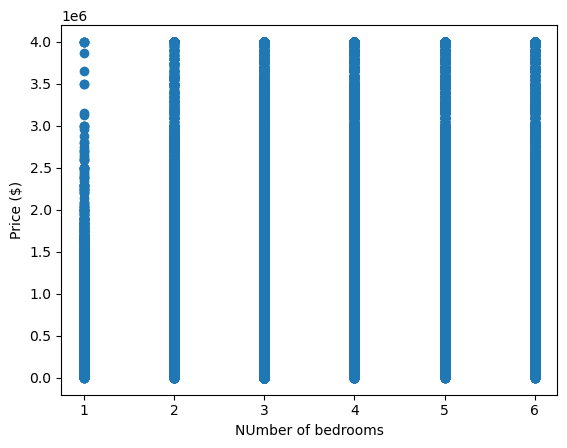

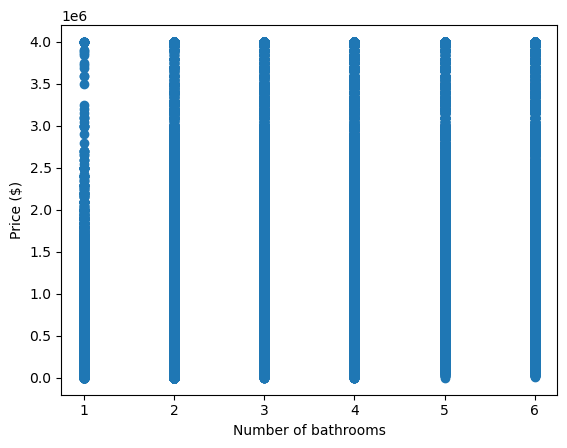

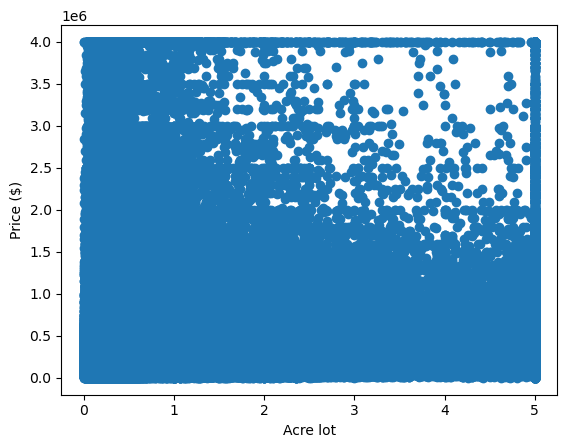

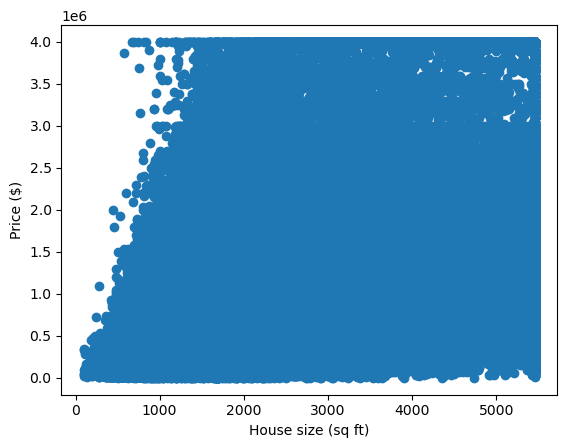

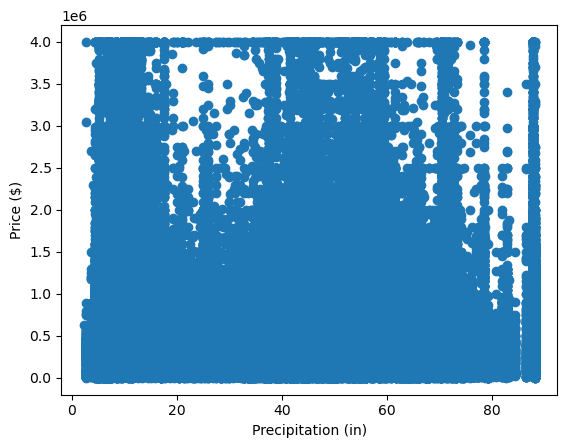

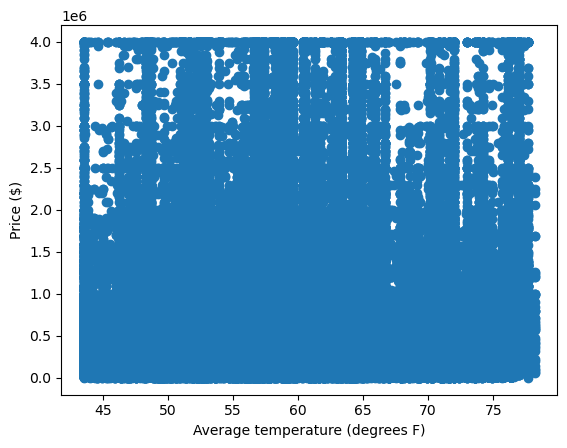

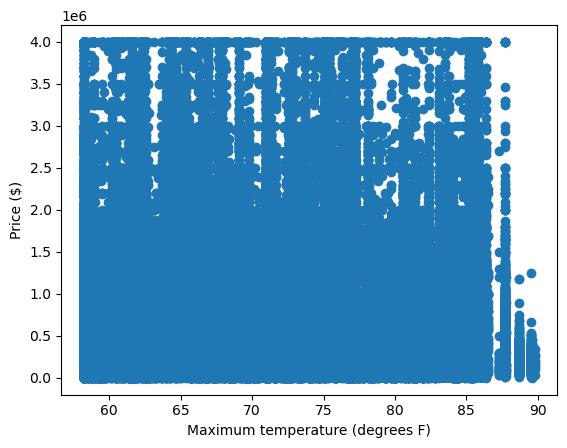

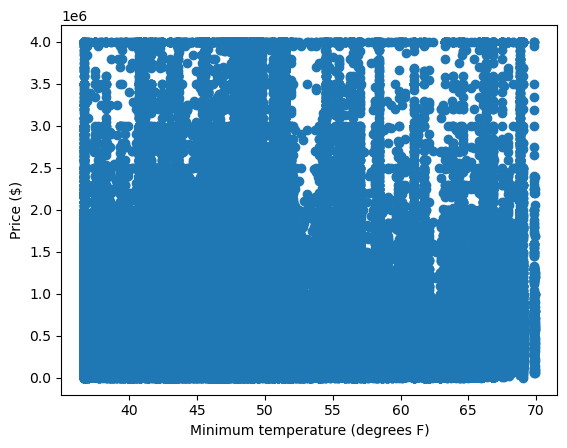

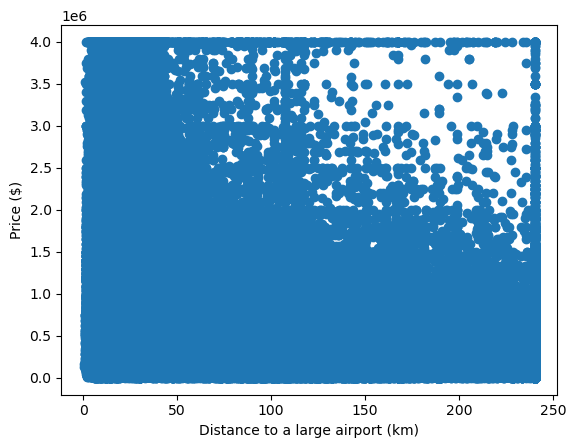

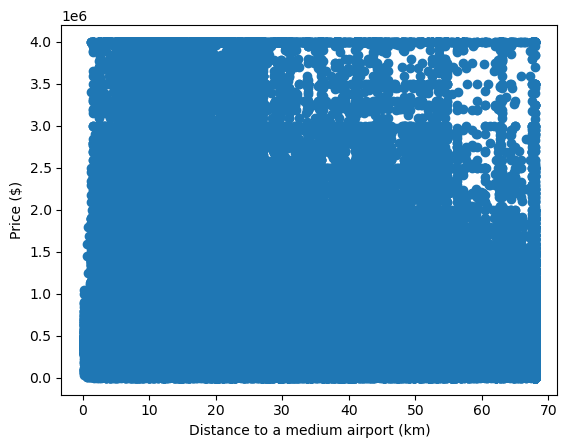

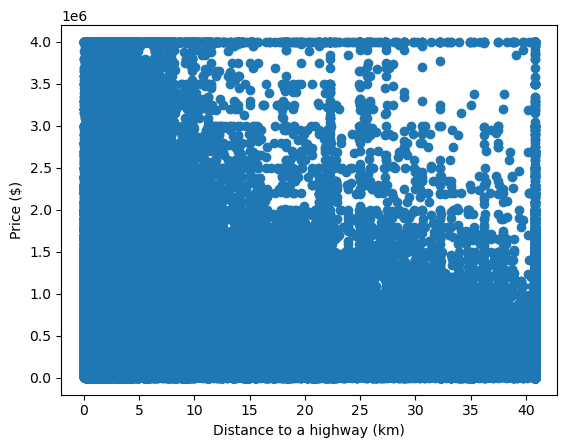

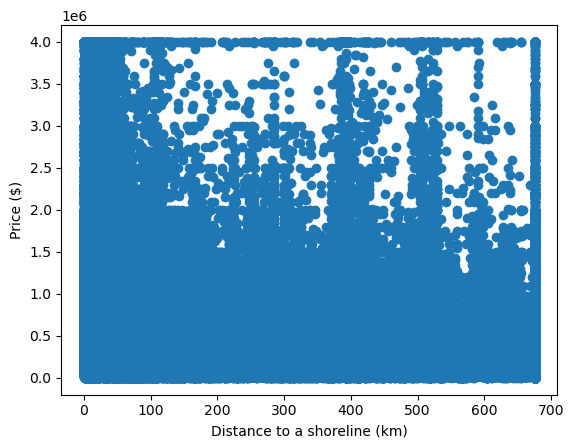

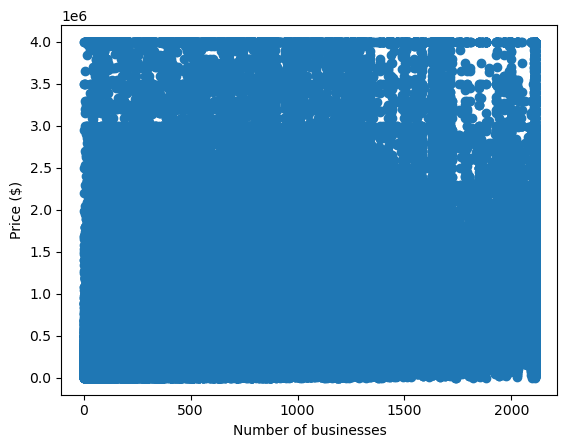

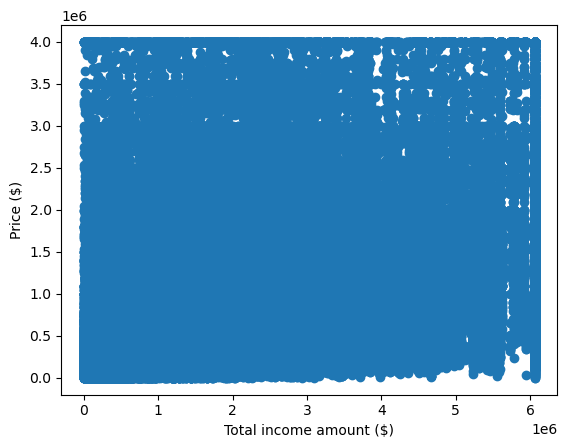

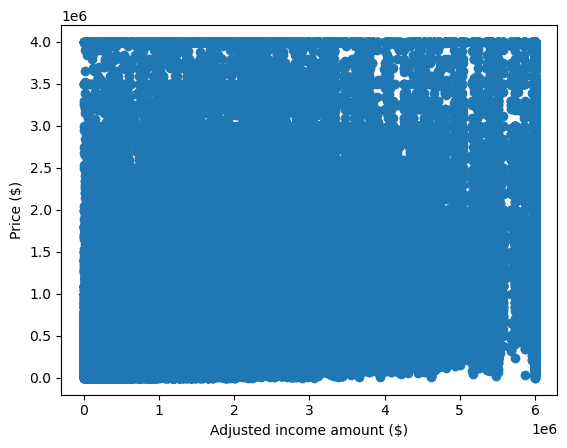

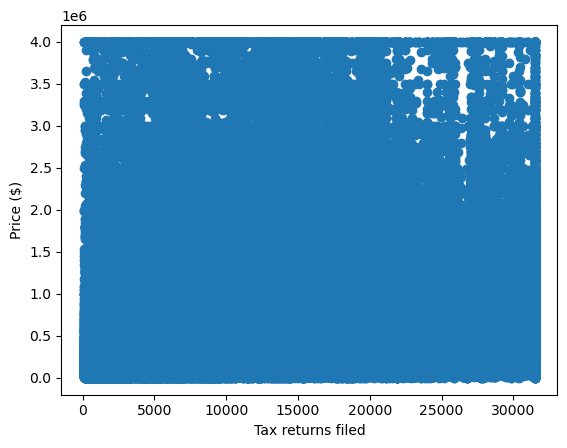

In [47]:
plt.scatter(sold.bed, sold.price)
plt.xlabel('NUmber of bedrooms')
plt.ylabel('Price ($)')
plt.show()
plt.scatter(sold.bath, sold.price)
plt.xlabel('Number of bathrooms')
plt.ylabel('Price ($)')
plt.show()
plt.scatter(sold.acre_lot, sold.price)
plt.xlabel('Acre lot')
plt.ylabel('Price ($)')
plt.show()
plt.scatter(sold.house_size, sold.price)
plt.xlabel('House size (sq ft)')
plt.ylabel('Price ($)')
plt.show()
plt.scatter(sold.precipitation, sold.price)
plt.xlabel('Precipitation (in)')
plt.ylabel('Price ($)')
plt.show()
plt.scatter(sold.avgtemp, sold.price)
plt.xlabel('Average temperature (degrees F)')
plt.ylabel('Price ($)')
plt.show()
plt.scatter(sold.maxtemp, sold.price)
plt.xlabel('Maximum temperature (degrees F)')
plt.ylabel('Price ($)')
plt.show()
plt.scatter(sold.mintemp, sold.price)
plt.xlabel('Minimum temperature (degrees F)')
plt.ylabel('Price ($)')
plt.show()
plt.scatter(sold.dlairport, sold.price)
plt.xlabel('Distance to a large airport (km)')
plt.ylabel('Price ($)')
plt.show()
plt.scatter(sold.dmairport, sold.price)
plt.xlabel('Distance to a medium airport (km)')
plt.ylabel('Price ($)')
plt.show()
plt.scatter(sold.dhighway, sold.price)
plt.xlabel('Distance to a highway (km)')
plt.ylabel('Price ($)')
plt.show()
plt.scatter(sold.dshore, sold.price)
plt.xlabel('Distance to a shoreline (km)')
plt.ylabel('Price ($)')
plt.show()
plt.scatter(sold.nobusiness, sold.price)
plt.xlabel('Number of businesses')
plt.ylabel('Price ($)')
plt.show()
plt.scatter(sold.totalincome, sold.price)
plt.xlabel('Total income amount ($)')
plt.ylabel('Price ($)')
plt.show()
plt.scatter(sold.adjustedincome, sold.price)
plt.xlabel('Adjusted income amount ($)')
plt.ylabel('Price ($)')
plt.show()
plt.scatter(sold.tax_returns, sold.price)
plt.xlabel('Tax returns filed')
plt.ylabel('Price ($)')
plt.show()
